In [250]:
import random
def simulate_hat_game(n):
    hat = list(range(1, n + 1))
    history = []
    
    while len(hat) > 1:
        num1, num2 = random.sample(hat, 2)
        difference = abs(num1 - num2)
        hat.remove(num1)
        hat.remove(num2)
        hat.append(difference)
        history.append((num1, num2, difference))
    return hat[0], history

final_number, history = simulate_hat_game(2025)
print(f"Single simulation result:")
print(f"Final number: {final_number}")
print("\nFirst 5 steps:")
for i, (num1, num2, diff) in enumerate(history[:5], 1):
    print(f"{i}: Removed {num1} and {num2} --> Puts in {diff}")


Single simulation result:
Final number: 67

First 5 steps:
1: Removed 1870 and 1700 --> Puts in 170
2: Removed 813 and 777 --> Puts in 36
3: Removed 1339 and 1509 --> Puts in 170
4: Removed 197 and 1003 --> Puts in 806
5: Removed 897 and 185 --> Puts in 712



Results from 50000 simulations:
Unique final numbers found: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 217, 219, 221]

Relative Proportions:
Number 1: 0.0367
Number 3: 0.0359
Number 5: 0.0342
Number 7: 0.0341
Number 9: 0.0326
Number 11: 0.0322
Number 13: 0.0309
Number 15: 0.0286
Number 17: 0.0279
Number 19: 0.0273
Number 21: 0.0281
Number 23: 0.0259
Number 25: 0.0248
Number 27: 0.0252
Number 29: 0.0239
Number 31: 0.0223
Number 33: 0.0222
Number 35: 0.0204
Number 37: 0.0196
Number 39: 0.0200
Number 41: 0.0200
Number 43: 0.0190
Number 45: 0.0187
Number 47: 0.017

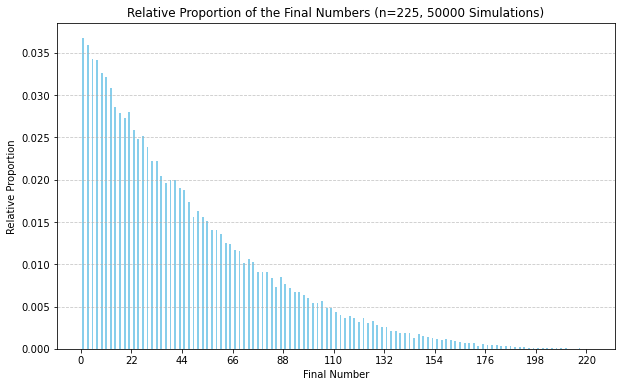

In [197]:
import random
import matplotlib.pyplot as plt

def simulate_hat_game(n):
    hat = list(range(1, n + 1))
    history = []
    
    while len(hat) > 1:
        num1, num2 = random.sample(hat, 2)
        difference = abs(num1 - num2) 
        hat.remove(num1)
        hat.remove(num2)
        hat.append(difference)
        history.append((num1, num2, difference))
    return hat[0], history

def run_multiple_simulations(n, num_simulations):
    results = []
    for i in range(num_simulations):
        final_number, _ = simulate_hat_game(n)
        results.append(final_number)
    
    unique_results = set(results)
    print(f"\nResults from {num_simulations} simulations:")
    print(f"Unique final numbers found: {sorted(unique_results)}")
    
    frequencies = {}
    for result in results:
        frequencies[result] = frequencies.get(result, 0) + 1
    
    print("\nRelative Proportions:")
    for number in sorted(frequencies.keys()):
        proportion = frequencies[number] / num_simulations
        print(f"Number {number}: {proportion:.4f}")
    
    plt.figure(figsize=(10, 6))
    relative_frequencies = {key: value / num_simulations for key, value in frequencies.items()}
    plt.bar(relative_frequencies.keys(), relative_frequencies.values(), color='skyblue')
    plt.xlabel('Final Number')
    plt.ylabel('Relative Proportion')
    plt.title(f'Relative Proportion of the Final Numbers (n={n}, {num_simulations} Simulations)')

    max_num = max(relative_frequencies.keys())
    plt.xticks(range(0, max_num + 1, max(1, max_num // 10)))
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

run_multiple_simulations(225, 50000)


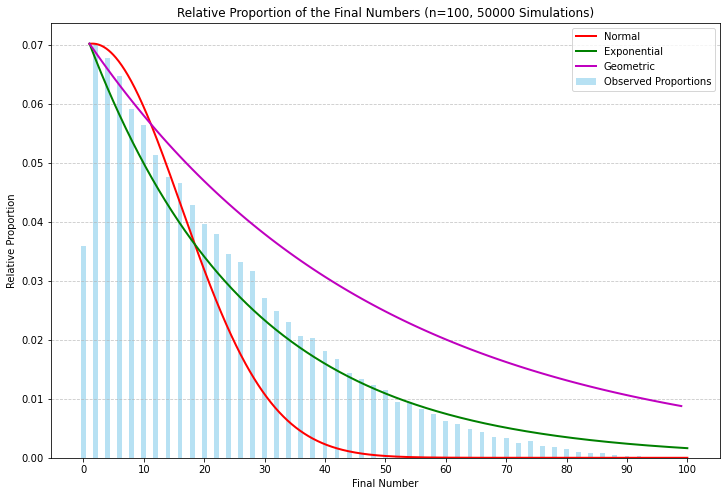

In [251]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, expon, geom

def simulate_hat_game(n):
    hat = list(range(1, n + 1))
    history = []
    
    while len(hat) > 1:
        num1, num2 = random.sample(hat, 2)
        difference = abs(num1 - num2) 
        hat.remove(num1)
        hat.remove(num2)
        hat.append(difference)
        history.append((num1, num2, difference))
    return hat[0], history

def plot_with_distributions(frequencies, n, num_simulations, norm_scale=1, exp_scale=1, geom_p=0.1):
    total = sum(frequencies.values())
    proportions = {k: v/total for k, v in frequencies.items()}
    plt.figure(figsize=(12, 8))
    numbers = list(proportions.keys())
    props = list(proportions.values())
    plt.bar(numbers, props, color='skyblue', alpha=0.6, label='Observed Proportions')
    
    x = np.linspace(1, max(numbers), 1000)
    
    mu = 1.5
    sigma = np.std(list(frequencies.keys()))
    normal = norm.pdf(x, mu, sigma * norm_scale)
    normal = normal * (max(props) / max(normal))
    plt.plot(x, normal, 'r-', label=f'Normal', linewidth=2)
    
    beta = 1/np.mean(list(frequencies.keys()))
    exponential = expon.pdf(x, scale=1/(beta*exp_scale))
    exponential = exponential * (max(props) / max(exponential))
    plt.plot(x, exponential, 'g-', label=f'Exponential', linewidth=2)
    
    x_geom = np.arange(1, max(numbers))
    geometric = geom.pmf(x_geom, geom_p)
    geometric = geometric * (max(props) / max(geometric))
    plt.plot(x_geom, geometric, 'm-', label=f'Geometric', linewidth=2)
    
    plt.xlabel('Final Number')
    plt.ylabel('Relative Proportion')
    plt.title(f'Relative Proportion of the Final Numbers (n={n}, {num_simulations} Simulations)')
    max_num = max(frequencies.keys())
    plt.xticks(range(0, max_num + 1, max(1, max_num // 10)))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

def run_multiple_simulations(n, num_simulations, norm_scale=1, exp_scale=1, geom_p=0.1):
    results = []
    for i in range(num_simulations):
        final_number, _ = simulate_hat_game(n)
        results.append(final_number)
    
    unique_results = set(results)
    frequencies = {}
    for result in results:
        frequencies[result] = frequencies.get(result, 0) + 1
    plot_with_distributions(frequencies, n, num_simulations, norm_scale, exp_scale, geom_p)
    return frequencies

frequencies = run_multiple_simulations(100, 50000, norm_scale=0.5, exp_scale=1.9, geom_p=0.021)

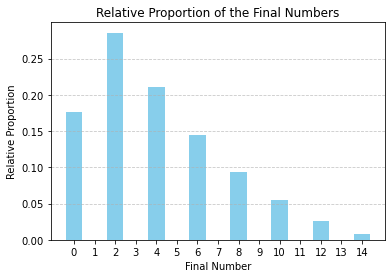

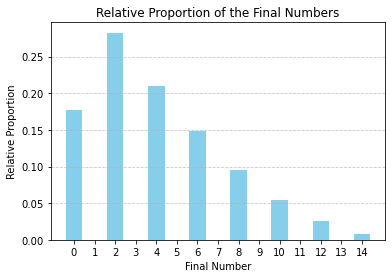

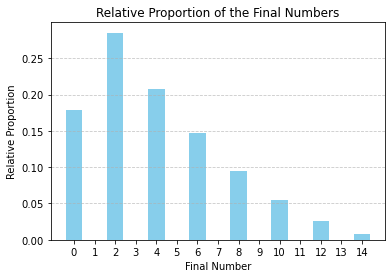

In [249]:
import random
import matplotlib.pyplot as plt

def simulate_hat_game_with_first_choice(n, first_num):
    hat = list(range(1, n + 1))
    history = [] 
    if first_num not in hat:
        raise ValueError("Chosen number must be in the hat!")
    
    hat.remove(first_num)
    second_num = random.choice(hat)
    hat.remove(second_num)
    
    difference = abs(first_num - second_num)
    hat.append(difference)
    history.append((first_num, second_num, difference))
    
    while len(hat) > 1:
        num1, num2 = random.sample(hat, 2)
        difference = abs(num1 - num2)
        hat.remove(num1)
        hat.remove(num2)
        hat.append(difference)
        history.append((num1, num2, difference))
    
    return hat[0], history

def run_multiple_simulations_with_first_choice(n, num_simulations, first_num):
    results = []
    for i in range(num_simulations):
        final_number, _ = simulate_hat_game(n)
        results.append(final_number)
    
    unique_results = set(results)
    frequencies = {}
    for result in results:
        frequencies[result] = frequencies.get(result, 0) + 1
       
    plt.figure(figsize=(6, 4))
    relative_frequencies = {key: value / num_simulations for key, value in frequencies.items()}
    plt.bar(relative_frequencies.keys(), relative_frequencies.values(), color='skyblue')
    plt.xlabel('Final Number')
    plt.ylabel('Relative Proportion')
    plt.title(f'Relative Proportion of the Final Numbers')

    max_num = max(relative_frequencies.keys())
    plt.xticks(range(0, max_num + 1, max(1, max_num // 10)))
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

run_multiple_simulations_with_first_choice(15, 100000, first_num=1)
run_multiple_simulations_with_first_choice(15, 100000, first_num=8)
run_multiple_simulations_with_first_choice(15, 100000, first_num=15)